In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for train-test split
from sklearn.model_selection import train_test_split

# for scaling data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# for linear regression, ridge regression, and lasso regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# evaluating model performance
from sklearn.metrics import r2_score

# importing rfe
from sklearn.feature_selection import RFE

# importing joblib
import joblib

In [2]:
# setting color palette
sns.set_palette('Blues_d')

In [3]:
# reading dataset
df = pd.read_csv('Medical Cost.csv', low_memory = False)

In [4]:
# displaying first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# inspecting data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking for any duplicate records
print(f'Medical cost data contains {sum(df.duplicated())} duplicate record.')

Medical cost data contains 1 duplicate record.


In [7]:
# removing duplicate record
df = df.drop_duplicates()

In [8]:
# checking for any missing values
print(f'Medical cost data contains {sum(df.isnull().sum())} missing values.')

Medical cost data contains 0 missing values.


In [9]:
# inspecting object data type columns for data quality
object_columns = list(df.select_dtypes(include = 'object').columns)

for column in object_columns:
    print(f'{column}:\n{df[column].unique()}', end = '\n\n')

sex:
['female' 'male']

smoker:
['yes' 'no']

region:
['southwest' 'southeast' 'northwest' 'northeast']



### Categorical Variables Exploration

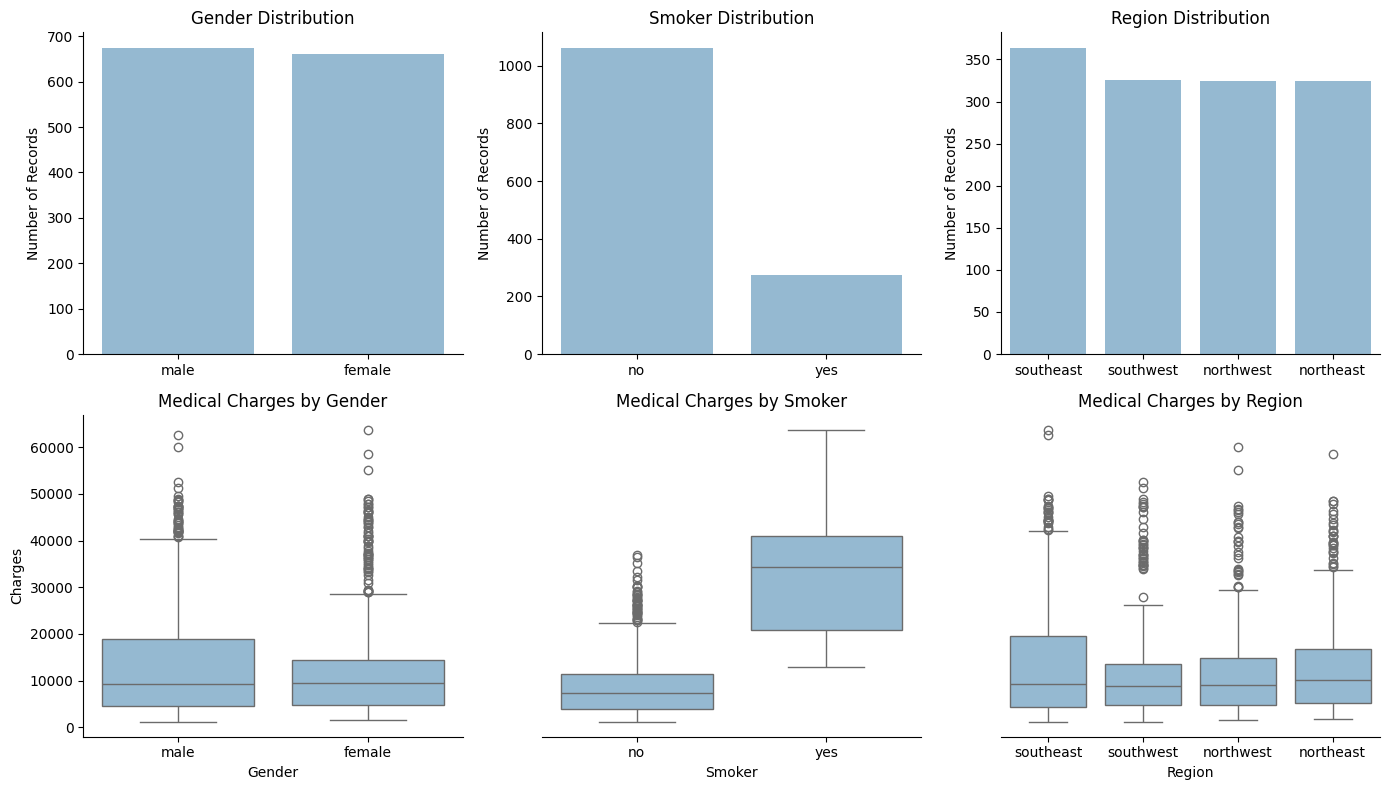

In [10]:
# visualizing categorical distribution
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))

sns.countplot(data = df, x = 'sex', order = df['sex'].value_counts().index, ax = axs[0][0])
axs[0][0].set_title('Gender Distribution')
axs[0][0].set_xlabel('')
axs[0][0].set_ylabel('Number of Records')
axs[0][0].spines[['top', 'right']].set_visible(False)

sns.countplot(data = df, x = 'smoker', order = df['smoker'].value_counts().index, ax = axs[0][1])
axs[0][1].set_title('Smoker Distribution')
axs[0][1].set_xlabel('')
axs[0][1].set_ylabel('Number of Records')
axs[0][1].spines[['top', 'right']].set_visible(False)

sns.countplot(data = df, x = 'region', order = df['region'].value_counts().index, ax = axs[0][2])
axs[0][2].set_title('Region Distribution')
axs[0][2].set_xlabel('')
axs[0][2].set_ylabel('Number of Records')
axs[0][2].spines[['top', 'right']].set_visible(False)

sns.boxplot(data = df, x = 'sex', y = 'charges', order = df['sex'].value_counts().index, ax = axs[1][0])
axs[1][0].set_title('Medical Charges by Gender')
axs[1][0].set_xlabel('Gender')
axs[1][0].set_ylabel('Charges')
axs[1][0].spines[['top', 'right']].set_visible(False)

sns.boxplot(data = df, x = 'smoker', y = 'charges', order = df['smoker'].value_counts().index, ax = axs[1][1])
axs[1][1].set_title('Medical Charges by Smoker')
axs[1][1].set_xlabel('Smoker')
axs[1][1].set_ylabel('')
axs[1][1].set_yticks([])
axs[1][1].spines[['left', 'top', 'right']].set_visible(False)

sns.boxplot(data = df, x = 'region', y = 'charges', order = df['region'].value_counts().index, ax = axs[1][2])
axs[1][2].set_title('Medical Charges by Region')
axs[1][2].set_xlabel('Region')
axs[1][2].set_ylabel('')
axs[1][2].set_yticks([])
axs[1][2].spines[['left', 'top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

### Numerical Variables Exploration

In [11]:
# statistical summary
round(df.describe().loc[['min', 'mean', '25%', '50%', '75%', 'max', 'std']], 2)

,age,bmi,children,charges
min,18.00,15.96,0.00,1121.87
mean,39.22,30.66,1.10,13279.12
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43
std,14.04,6.10,1.21,12110.36


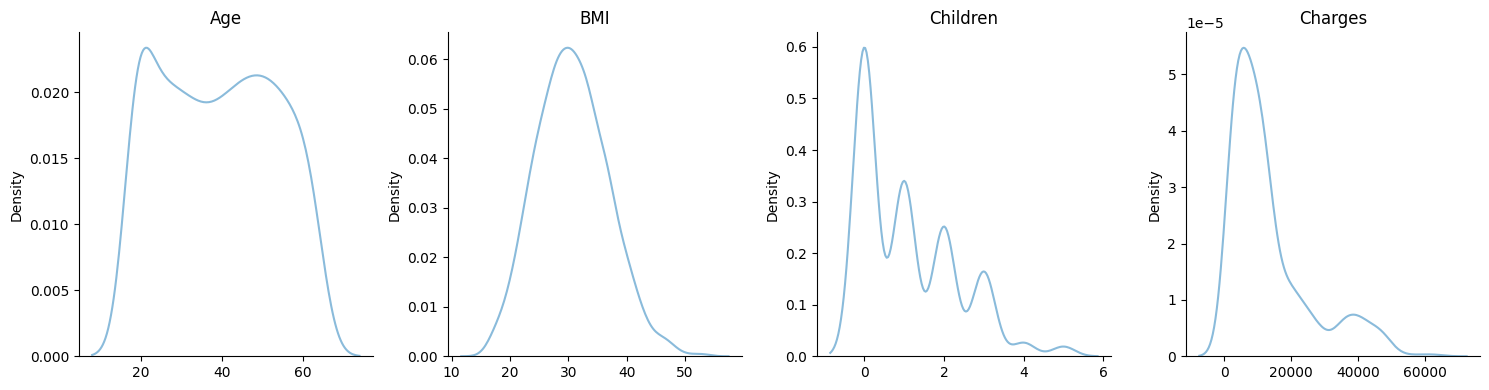

In [12]:
# visualizing numerical distribution
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

sns.kdeplot(data = df, x = 'age', ax = axs[0])
axs[0].set_title('Age')
axs[0].set_xlabel('')
axs[0].spines[['top', 'right']].set_visible(False)

sns.kdeplot(data = df, x = 'bmi', ax = axs[1])
axs[1].set_title('BMI')
axs[1].set_xlabel('')
axs[1].spines[['top', 'right']].set_visible(False)

sns.kdeplot(data = df, x = 'children', ax = axs[2])
axs[2].set_title('Children')
axs[2].set_xlabel('')
axs[2].spines[['top', 'right']].set_visible(False)

sns.kdeplot(data = df, x = 'charges', ax = axs[3])
axs[3].set_title('Charges')
axs[3].set_xlabel('')
axs[3].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

### Relation Between Numerical Variables

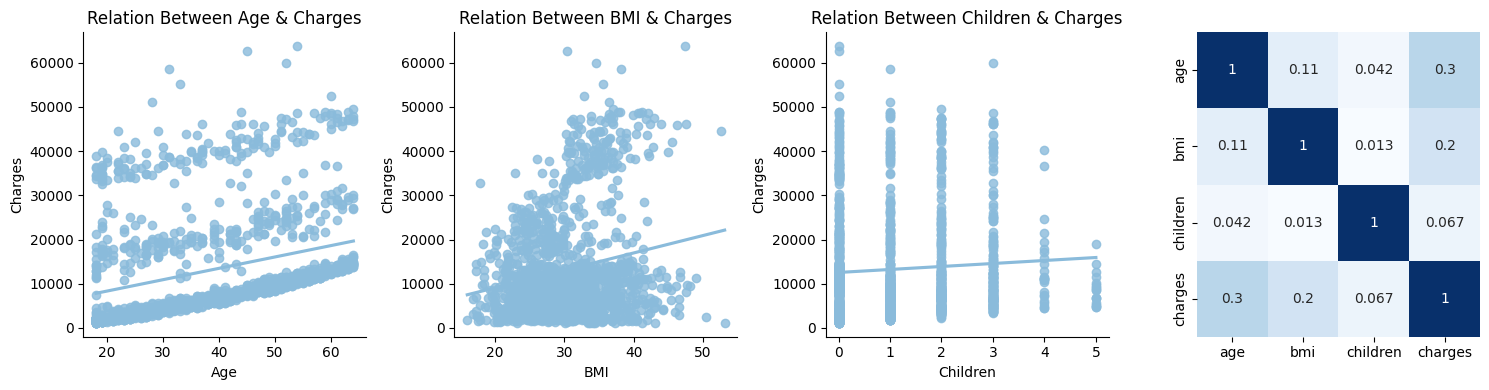

In [13]:
# visualizing relation between numerical distribution
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

sns.regplot(data = df, x = 'age', y = 'charges', ci = False, ax = axs[0])
axs[0].set_title('Relation Between Age & Charges')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Charges')
axs[0].spines[['top', 'right']].set_visible(False)

sns.regplot(data = df, x = 'bmi', y = 'charges', ci = False, ax = axs[1])
axs[1].set_title('Relation Between BMI & Charges')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Charges')
axs[1].spines[['top', 'right']].set_visible(False)

sns.regplot(data = df, x = 'children', y = 'charges', ci = False, ax = axs[2])
axs[2].set_title('Relation Between Children & Charges')
axs[2].set_xlabel('Children')
axs[2].set_ylabel('Charges')
axs[2].spines[['top', 'right']].set_visible(False)

sns.heatmap(data = df.select_dtypes(exclude = 'object').corr(), annot = True, cmap = 'Blues', cbar = False, ax = axs[3])

plt.tight_layout()
plt.show()

### Relation Between Variables

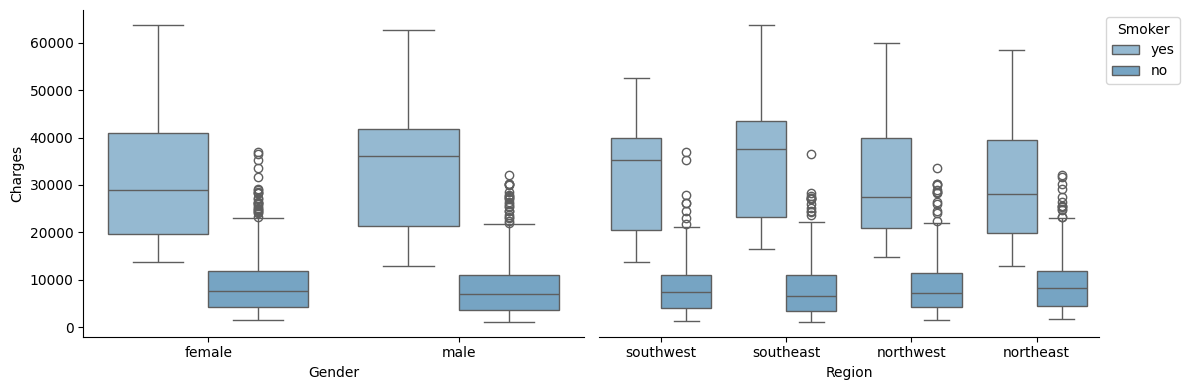

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# interaction between smoker and sex on charges
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'smoker', ax = axs[0])
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Charges')
axs[0].legend().set_visible(False)
axs[0].spines[['top', 'right']].set_visible(False)

# interaction between smoker and region on charges
sns.boxplot(data = df, x = 'region', y = 'charges', hue = 'smoker', ax = axs[1])
axs[1].set_xlabel('Region')
axs[1].set_ylabel('')
axs[1].set_yticks([])
axs[1].legend(title = 'Smoker', bbox_to_anchor = (1, 1), loc = 'upper left')
axs[1].spines[['left', 'top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

### Outliers

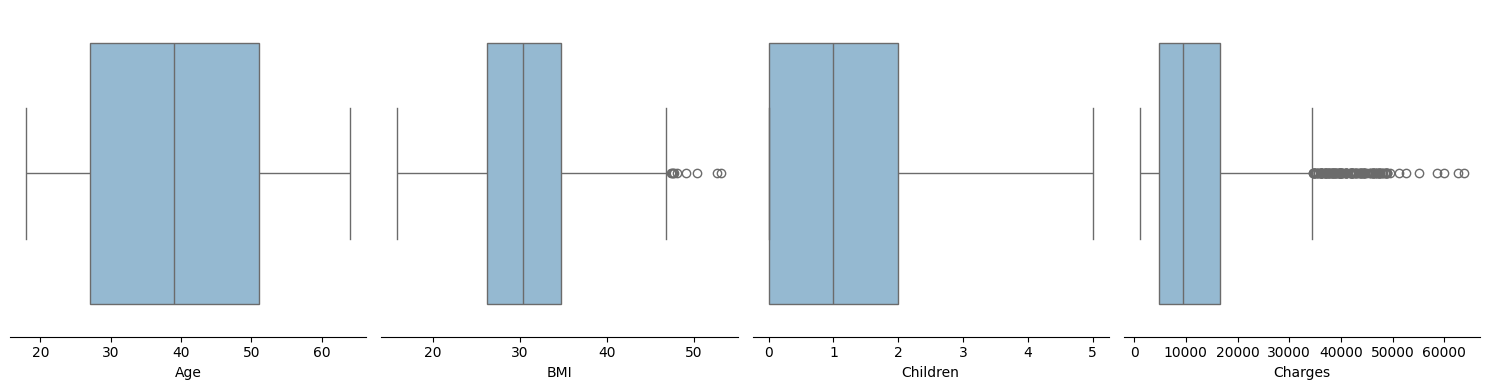

In [15]:
# inspecting outliers using boxplots
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

sns.boxplot(data = df, x = 'age', ax = axs[0])
axs[0].set_xlabel('Age')
axs[0].set_yticks([])
axs[0].spines[['left', 'top', 'right']].set_visible(False)

sns.boxplot(data = df, x = 'bmi', ax = axs[1])
axs[1].set_xlabel('BMI')
axs[1].set_yticks([])
axs[1].spines[['left', 'top', 'right']].set_visible(False)

sns.boxplot(data = df, x = 'children', ax = axs[2])
axs[2].set_xlabel('Children')
axs[2].set_yticks([])
axs[2].spines[['left', 'top', 'right']].set_visible(False)

sns.boxplot(data = df, x = 'charges', ax = axs[3])
axs[3].set_xlabel('Charges')
axs[3].set_yticks([])
axs[3].spines[['left', 'top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
# outlier treatment
numerical_columns = list(df.select_dtypes(exclude = 'object').columns)

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

### Inspecting Skewness

In [17]:
# skewness
print('Skewness (Age):', round(df['age'].skew(), 2))
print('Skewness (BMI):', round(df['bmi'].skew(), 2))
print('Skewness (Children):', round(df['children'].skew(), 2))
print('Skewness (Charges):', round(df['charges'].skew(), 2))

Skewness (Age): 0.05
Skewness (BMI): 0.23
Skewness (Children): 0.94
Skewness (Charges): 1.08


In [18]:
# treating skewness
df['children'] = np.sqrt(df['children']) # square root transformation is apt for small range data like number of children
df['charges'] = np.log(df['charges']) # log transformation is apt for wide range data like medical charges

In [19]:
# renaming columns
df = df.rename(columns = {'children':'sqrt_children', 'charges':'log_charges'})
df.head()

,age,sex,bmi,sqrt_children,smoker,region,log_charges
0,19.0,female,27.900,0.000000,yes,southwest,9.734176
1,18.0,male,33.770,1.000000,no,southeast,7.453302
2,28.0,male,33.000,1.732051,no,southeast,8.400538
3,33.0,male,22.705,0.000000,no,northwest,9.998092
4,32.0,male,28.880,0.000000,no,northwest,8.260197


### One Hot Encoding

In [20]:
# one hot encoding
object_columns = list(df.select_dtypes(include = 'object').columns)

df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

boolean_columns = list(df.select_dtypes(include = 'bool').columns)
for column in boolean_columns:
    df[column] = df[column].astype('int')
    
df.head()

,age,bmi,sqrt_children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.000000,9.734176,0,1,0,0,1
1,18.0,33.770,1.000000,7.453302,1,0,0,1,0
2,28.0,33.000,1.732051,8.400538,1,0,0,1,0
3,33.0,22.705,0.000000,9.998092,1,0,1,0,0
4,32.0,28.880,0.000000,8.260197,1,0,1,0,0


### Variance Inflation Factor (VIF)

In [21]:
# vif
x = df.drop('log_charges', axis = 1)

vif = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index = x.columns)
print(f'VIF Values:\n{vif}')

VIF Values:
age                  7.751077
bmi                 11.539972
sqrt_children        2.131001
sex_male             2.001682
smoker_yes           1.261846
region_northwest     1.891729
region_southeast     2.264847
region_southwest     1.962163
dtype: float64


In [22]:
# dropping bmi (since it had a high variance inflation factor) and recalculating
x = x.drop('bmi', axis = 1)

vif = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index = x.columns)
print(f'VIF Values:\n{vif}')

VIF Values:
age                 3.977386
sqrt_children       2.052217
sex_male            1.887535
smoker_yes          1.250851
region_northwest    1.716133
region_southeast    1.804324
region_southwest    1.720555
dtype: float64


### Train Test Split

In [23]:
# train test split
y = df['log_charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### Scaling Data

In [24]:
# scaling data
scaler = StandardScaler()
x_train_scaled, x_test_scaled = scaler.fit_transform(x_train), scaler.transform(x_test)

In [25]:
# saving scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

### Linear Regression Models

In [26]:
# linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
lr_train_pred = lr_model.predict(x_train_scaled)
lr_test_pred = lr_model.predict(x_test_scaled)
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("Linear Regression R2 Scores:")
print(f"Training R2: {round(lr_train_r2 * 100, 2)}%, Testing R2: {round(lr_test_r2 * 100, 2)}%")

Linear Regression R2 Scores:
Training R2: 73.63%, Testing R2: 76.33%


### Linear Regression Equation

In [27]:
# linear regression equation
coefficients = lr_model.coef_
intercept = lr_model.intercept_
equation = f"{intercept:.2f}"
for i, feature in enumerate(x.columns):
    equation += f" + ({coefficients[i]:.2f} * {feature})"
print("Linear Regression Equation to Predict Log(Medical Cost):", end = " ")
print(equation)

Linear Regression Equation to Predict Log(Medical Cost): 9.11 + (0.47 * age) + (0.12 * sqrt_children) + (-0.05 * sex_male) + (0.59 * smoker_yes) + (-0.03 * region_northwest) + (-0.06 * region_southeast) + (-0.05 * region_southwest)


### Recursive Feature Elimination

In [28]:
# creating an instance of linear regression
lr = LinearRegression()

# defining rfe
rfe = RFE(estimator = lr, n_features_to_select = 5, step = 1)

# fit rfe
x_train_scaled = scaler.fit_transform(x_train)
rfe.fit(x_train_scaled, y_train)

# fetching selected features
selected_features = x.columns[rfe.support_]
print("Selected features through RFE:", selected_features)

Selected features through RFE: Index(['age', 'sqrt_children', 'sex_male', 'smoker_yes', 'region_southeast'], dtype='object')


In [29]:
# preparing x and y for linear regression model
x = x[selected_features] # features selected using rfe
y = df['log_charges']

# train test split
y = df['log_charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# scaling data
scaler = StandardScaler()
x_train_scaled, x_test_scaled = scaler.fit_transform(x_train), scaler.transform(x_test)

In [30]:
# linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
lr_train_pred = lr_model.predict(x_train_scaled)
lr_test_pred = lr_model.predict(x_test_scaled)
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("Linear Regression R2 Scores:")
print(f"Training R2: {round(lr_train_r2 * 100, 2)}%, Testing R2: {round(lr_test_r2 * 100, 2)}%")

Linear Regression R2 Scores:
Training R2: 73.42%, Testing R2: 76.17%


In [31]:
# linear regression equation
coefficients = lr_model.coef_
intercept = lr_model.intercept_
equation = f"{intercept:.2f}"
for i, feature in enumerate(x.columns):
    equation += f" + ({coefficients[i]:.2f} * {feature})"
print("Linear Regression Equation to Predict Log(Medical Cost):", end = " ")
print(equation)

Linear Regression Equation to Predict Log(Medical Cost): 9.11 + (0.47 * age) + (0.12 * sqrt_children) + (-0.05 * sex_male) + (0.59 * smoker_yes) + (-0.03 * region_southeast)


### Ridge & Lasso Regression Models

In [32]:
# preparing x and y for ridge and lasso models
x = df.drop('log_charges', axis = 1)
y = df['log_charges']

# introducing polynomial features
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
x = poly.fit_transform(x)

# train test split
y = df['log_charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# scaling data
scaler = StandardScaler()
x_train_scaled, x_test_scaled = scaler.fit_transform(x_train), scaler.transform(x_test)

In [33]:
# ridge regression model
ridge_model = Ridge(alpha = 1) # a higher value implements a higher penalty
ridge_model.fit(x_train_scaled, y_train)
ridge_train_pred = ridge_model.predict(x_train_scaled)
ridge_test_pred = ridge_model.predict(x_test_scaled)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("Ridge Regression R2 Scores:")
print(f"Training R2: {round(ridge_train_r2 * 100, 2)}%, Testing R2: {round(ridge_test_r2 * 100, 2)}%")

Ridge Regression R2 Scores:
Training R2: 82.78%, Testing R2: 83.64%


In [34]:
# Linear regression equation
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
feature_names = poly.get_feature_names_out(input_features=df.drop('log_charges', axis = 1).columns)
equation = f"{intercept:.2f}"

for i, feature in enumerate(feature_names):  # Use feature_names here
    equation += f" + ({coefficients[i]:.2f} * {feature})"

print('Linear Regression Equation to Predict Log(Medical Cost):', end = ' ')
print(equation)

Linear Regression Equation to Predict Log(Medical Cost): 9.11 + (0.72 * age) + (0.26 * bmi) + (0.33 * sqrt_children) + (-0.13 * sex_male) + (0.37 * smoker_yes) + (-0.06 * region_northwest) + (-0.03 * region_southeast) + (-0.07 * region_southwest) + (-0.14 * age^2) + (-0.12 * age bmi) + (-0.21 * age sqrt_children) + (0.13 * age sex_male) + (-0.61 * age smoker_yes) + (0.09 * age region_northwest) + (0.18 * age region_southeast) + (0.17 * age region_southwest) + (-0.16 * bmi^2) + (-0.02 * bmi sqrt_children) + (0.07 * bmi sex_male) + (0.44 * bmi smoker_yes) + (-0.03 * bmi region_northwest) + (-0.21 * bmi region_southeast) + (-0.10 * bmi region_southwest) + (0.03 * sqrt_children^2) + (0.01 * sqrt_children sex_male) + (-0.11 * sqrt_children smoker_yes) + (0.04 * sqrt_children region_northwest) + (0.00 * sqrt_children region_southeast) + (-0.02 * sqrt_children region_southwest) + (-0.13 * sex_male^2) + (0.04 * sex_male smoker_yes) + (-0.00 * sex_male region_northwest) + (0.01 * sex_male regio

In [35]:
# lasso regression model
lasso_model = Lasso(alpha = 0.01) # a higher value implements a higher penalty
lasso_model.fit(x_train_scaled, y_train)
lasso_train_pred = lasso_model.predict(x_train_scaled)
lasso_test_pred = lasso_model.predict(x_test_scaled)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

print("Lasso Regression R2 Scores:")
print(f"Training R2: {round(lasso_train_r2 * 100, 2)}%, Testing R2: {round(lasso_test_r2 * 100, 2)}%")

Lasso Regression R2 Scores:
Training R2: 80.41%, Testing R2: 82.8%


In [36]:
# Linear regression equation
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
feature_names = poly.get_feature_names_out(input_features=df.drop('log_charges', axis = 1).columns)
equation = f"{intercept:.2f}"

for i, feature in enumerate(feature_names):  # Use feature_names here
    equation += f" + ({coefficients[i]:.2f} * {feature})"

print('Linear Regression Equation to Predict Log(Medical Cost):', end = ' ')
print(equation)

Linear Regression Equation to Predict Log(Medical Cost): 9.11 + (0.53 * age) + (0.02 * bmi) + (0.13 * sqrt_children) + (-0.01 * sex_male) + (0.55 * smoker_yes) + (-0.00 * region_northwest) + (-0.00 * region_southeast) + (-0.01 * region_southwest) + (0.00 * age^2) + (0.00 * age bmi) + (-0.00 * age sqrt_children) + (0.00 * age sex_male) + (-0.42 * age smoker_yes) + (-0.00 * age region_northwest) + (0.00 * age region_southeast) + (-0.00 * age region_southwest) + (0.00 * bmi^2) + (0.00 * bmi sqrt_children) + (-0.00 * bmi sex_male) + (0.43 * bmi smoker_yes) + (-0.00 * bmi region_northwest) + (-0.04 * bmi region_southeast) + (-0.00 * bmi region_southwest) + (0.01 * sqrt_children^2) + (0.00 * sqrt_children sex_male) + (-0.07 * sqrt_children smoker_yes) + (0.01 * sqrt_children region_northwest) + (-0.00 * sqrt_children region_southeast) + (-0.01 * sqrt_children region_southwest) + (-0.04 * sex_male^2) + (0.03 * sex_male smoker_yes) + (-0.01 * sex_male region_northwest) + (-0.00 * sex_male regi

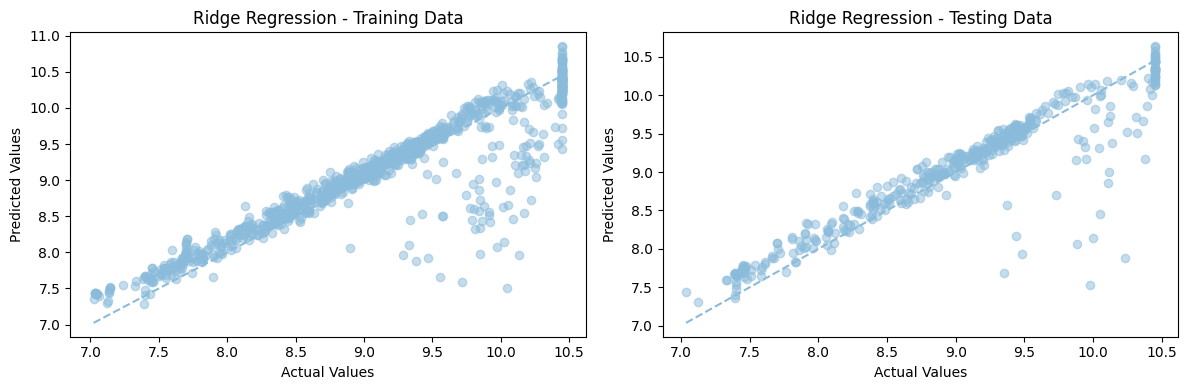

In [37]:
# plotting actual vs predicted for ridge regression model
plt.figure(figsize=(12, 4))

# training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, ridge_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle = '--')
plt.title('Ridge Regression - Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle = '--')
plt.title('Ridge Regression - Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


### Saving Ridge Regression Model

In [38]:
# saving model
joblib.dump(ridge_model, 'Ridge Regression Model.joblib')
print("Ridge regression model saved successfully.")

Ridge regression model saved successfully.
